In [16]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()

df = pd.read_sql_query("SELECT * FROM phishing_data", conn)
df = df.drop(columns="Unnamed: 0")
df.head()

,LineOfCode,LargestLineLength,NoOfURLRedirect,NoOfSelfRedirect,NoOfPopup,NoOfiFrame,NoOfImage,NoOfSelfRef,NoOfExternalRef,Robots,IsResponsive,Industry,HostingProvider,DomainAgeMonths,label
0,NaN,9965,0,0,2,1,48,172,170,1,1,Fashion,DreamHost,98,0
1,769.0,9507,0,0,0,4,25,55,78,1,1,Fashion,AWS,31,1
2,720.0,2550,0,0,0,2,-31,94,13,0,1,Education,Google Cloud,26,1
3,198.0,869,0,0,0,0,0,0,2,0,0,Unknown,DreamHost,2,1
4,972.0,2807,0,0,0,2,6,83,51,0,1,Education,GoDaddy,43,1


Inspecting the data structures, understand the data types and statistics

In [17]:
df.shape

(10500, 15)

In [18]:
df.describe(include='all')

,LineOfCode,LargestLineLength,NoOfURLRedirect,NoOfSelfRedirect,NoOfPopup,NoOfiFrame,NoOfImage,NoOfSelfRef,NoOfExternalRef,Robots,IsResponsive,Industry,HostingProvider,DomainAgeMonths,label
count,8145.000000,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,1.050000e+04,10500.00000,10500.000000,10500.000000,10500.000000,10500,10500,10500.000000,10500.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,13,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eCommerce,Unknown Provider,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2521,1177,NaN,NaN
mean,1376.952363,1.119796e+04,0.136762,0.038476,0.227524,1.668381,3.252675e+02,68.54219,51.152476,0.262952,0.623619,NaN,NaN,33.170190,0.550381
std,5751.557001,9.416898e+04,0.343612,0.192352,5.700292,5.016302,3.089686e+04,316.67927,204.902781,0.440258,0.484500,NaN,NaN,32.698117,0.497479
min,2.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,-3.500000e+01,0.00000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,88.000000,1.807500e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,1.000000,0.000000,0.000000,NaN,NaN,5.000000,0.000000
50%,620.000000,1.087500e+03,0.000000,0.000000,0.000000,0.000000,5.000000e+00,12.00000,10.000000,0.000000,1.000000,NaN,NaN,24.000000,1.000000
75%,1452.000000,8.047000e+03,0.000000,0.000000,0.000000,1.000000,2.500000e+01,87.00000,55.000000,1.000000,1.000000,NaN,NaN,52.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LineOfCode         8145 non-null   float64
 1   LargestLineLength  10500 non-null  int64  
 2   NoOfURLRedirect    10500 non-null  int64  
 3   NoOfSelfRedirect   10500 non-null  int64  
 4   NoOfPopup          10500 non-null  int64  
 5   NoOfiFrame         10500 non-null  int64  
 6   NoOfImage          10500 non-null  int64  
 7   NoOfSelfRef        10500 non-null  int64  
 8   NoOfExternalRef    10500 non-null  int64  
 9   Robots             10500 non-null  int64  
 10  IsResponsive       10500 non-null  int64  
 11  Industry           10500 non-null  object 
 12  HostingProvider    10500 non-null  object 
 13  DomainAgeMonths    10500 non-null  int64  
 14  label              10500 non-null  int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 1.2+ MB


Identify the missing values where cleaning is required

In [20]:
df.isnull().sum()

LineOfCode           2355
LargestLineLength       0
NoOfURLRedirect         0
NoOfSelfRedirect        0
NoOfPopup               0
NoOfiFrame              0
NoOfImage               0
NoOfSelfRef             0
NoOfExternalRef         0
Robots                  0
IsResponsive            0
Industry                0
HostingProvider         0
DomainAgeMonths         0
label                   0
dtype: int64

Feature Exploration

In [21]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col

['LineOfCode',
 'LargestLineLength',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'NoOfPopup',
 'NoOfiFrame',
 'NoOfImage',
 'NoOfSelfRef',
 'NoOfExternalRef',
 'Robots',
 'IsResponsive',
 'DomainAgeMonths',
 'label']

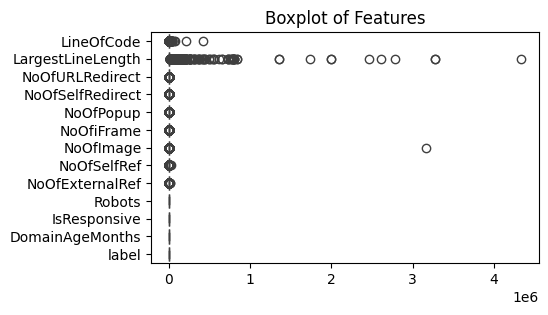

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df[num_col], orient='h')
plt.title('Boxplot of Features')
plt.show()

In [23]:
cat_col = df.select_dtypes(include='object').columns.tolist()
cat_col

['Industry', 'HostingProvider']

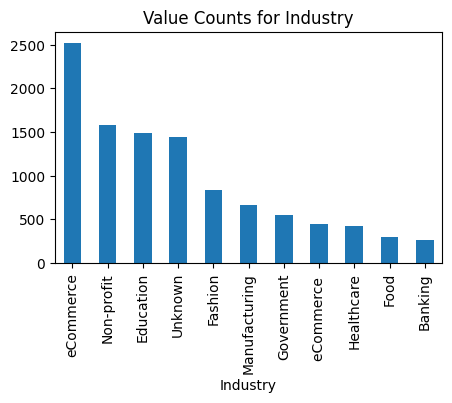

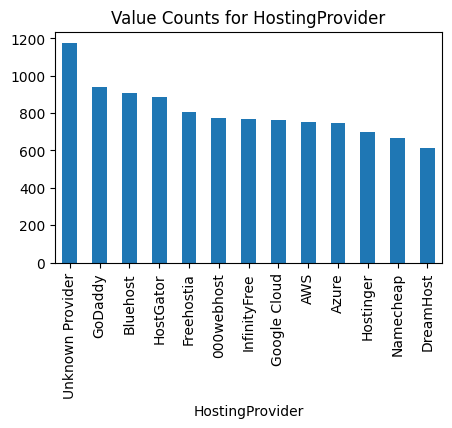

In [24]:
for col in cat_col:
    plt.figure(figsize=(5,3))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Value Counts for {col}")
    plt.show()

Target Variable

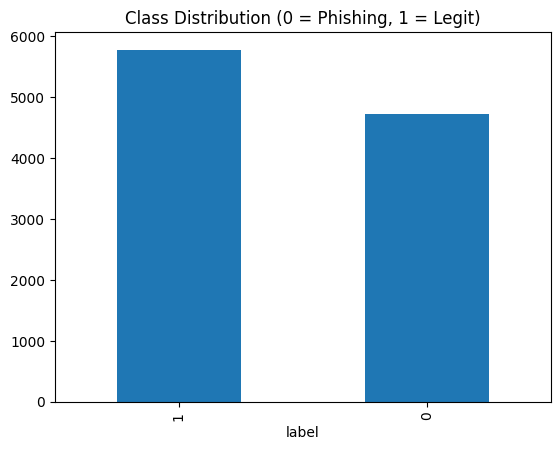

label
1    0.550381
0    0.449619
Name: proportion, dtype: float64

In [25]:
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution (0 = Phishing, 1 = Legit)")
plt.show()

df['label'].value_counts(normalize=True)

Correlation & Relationships

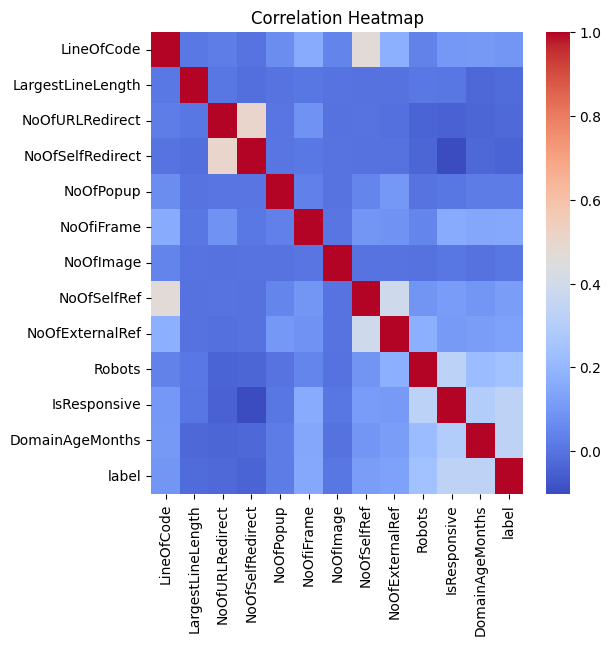

In [26]:
plt.figure(figsize=(6,6))
sns.heatmap(df[num_col].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

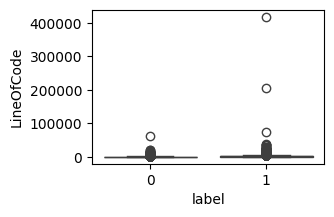

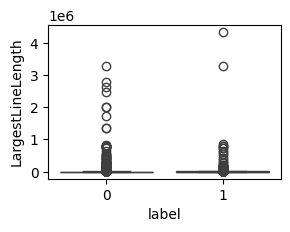

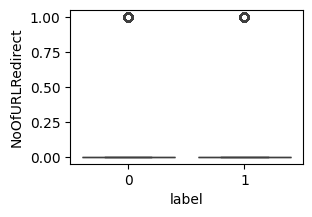

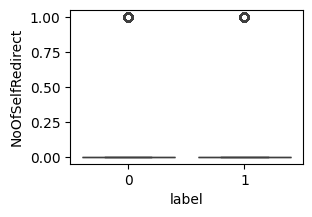

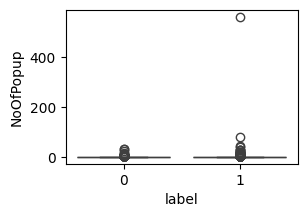

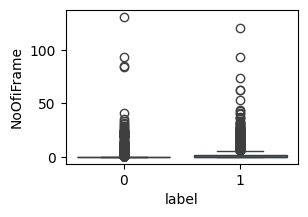

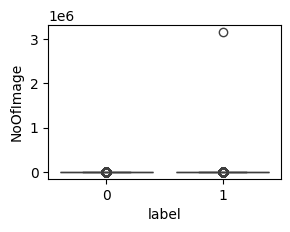

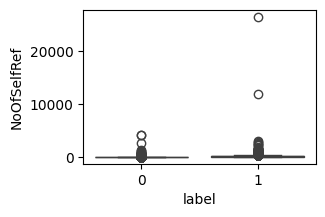

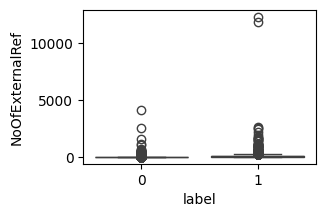

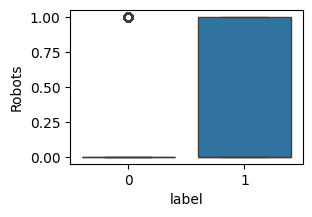

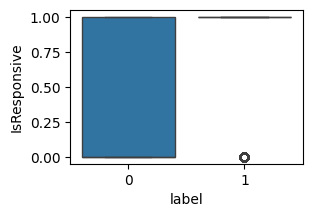

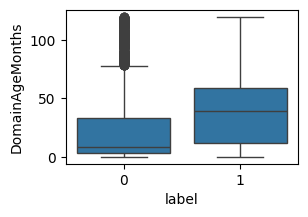

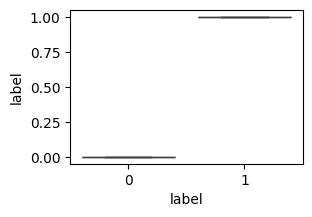

In [27]:
for col in num_col:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=df['label'], y=df[col])
    plt.show()

Summary

The dataset consists of 10,500 rows and 16 columns, including 14 numeric features and 2 categorical features (Industry, HostingProvider). The target variable is label, indicating whether a webpage is phishing (1) or legitimate (0).

Data Quality Observations
	•	The column Unnamed: 0 is an index artifact and contains no useful information.
→ It must be removed before modeling.
	•	Several features contain extreme values (outliers), especially LineOfCode, LargestLineLength, and image counts.
→ Outliers will be retained as tree-based models are robust to them.
	•	No major missing data issues detected (or specify which columns have NA).
	•	Class distribution for label is moderately imbalanced.
→ Justifies using class_weight="balanced" for logistic regression.

Feature Types
	•	Numeric features: (list them)
	•	Categorical features: Industry, HostingProvider

Key Insights
	•	Strong correlation expected among count-based variables (e.g., number of images, popups, frames).
	•	Numeric features have varying scales and skewed distributions.
→ Standardization is required.
	•	Categorical columns require encoding.

Decisions for Modeling
	•	Drop Unnamed: 0
	•	Use median imputation for numeric missing values.
	•	Use most frequent imputation for categorical missing values.
	•	Apply StandardScaler to numeric variables.
	•	Apply OneHotEncoder to categorical variables.
	•	Use stratified train/test split to preserve class distribution.
	•	Evaluate multiple models (LogReg, RandomForest, GradientBoosting).